<a href="https://colab.research.google.com/github/bala-codes/FAKE-VS-REAL-NEWS-CLASSIFIER-USING-ML-AND-DL-MODELS/blob/master/(codes%20NN%20%2B%20CNN)/Part%202%20of%20Fake%20News%20Classifier%20Embeded%20NN%20Single%20Input%20Edition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Importing the libraries which are required.
import pandas as pd
import nltk
import re
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pickle
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
nltk.download('wordnet')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
deprecation._PER_MODULE_WARNING_LIMIT = 0

from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
all_punctuations = string.punctuation + '‘’,:”][],' 

def punc_remover(raw_text):
    no_punct = "".join([i for i in raw_text if i not in all_punctuations])
    return no_punct

def stopword_remover(no_punc_text):
    words = no_punc_text.split()
    no_stp_words = " ".join([i for i in words if i not in stopwords.words('english')])
    return no_stp_words

lemmer = nltk.stem.WordNetLemmatizer()
def lem(words):
    return " ".join([lemmer.lemmatize(word,'v') for word in words.split()])
    
def text_cleaner(raw):
    cleaned_text = stopword_remover(punc_remover(raw))
    return lem(cleaned_text.lower())


def plot_preds1(val1, val2):
  class_labels = ['REAL', 'FAKE']
  j = [val1, val2]
  y_pos = np.arange(len(class_labels))
  colors = ['g','r']
  plt.barh(y_pos,j, color = colors, alpha = 0.6)
  plt.yticks(y_pos,class_labels)
  plt.title('PREDICTION FOR BEING FAKE VS REAL NEWS')
  plt.xlabel('Percentage')
  plt.ylabel('Labels')
  plt.show()


def plot_preds2(val1, val2):
  class_labels = ['REAL','FAKE']
  j = [val1, val2]
  y_pos = np.arange(len(class_labels))
  colors = ['g', 'r']
  plt.barh(y_pos,j, color = colors, alpha = 0.6)
  plt.yticks(y_pos,class_labels)
  plt.title('PREDICTION FOR BEING FAKE VS REAL NEWS')
  plt.xlabel('Percentage')
  plt.ylabel('Labels')
  plt.show()

# Run the below code if you want to use the Deep Forward Neural Network model and make the Prediction

In [ ]:
%%time
# Use the below function to load the Saved Tokenizer
with open('/content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 2 - SOURCE CODES AND FILES/Pretrained Models/CNN_tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

import tensorflow as tf 
from keras.preprocessing.sequence import pad_sequences
maxlen1 = 800

nn_emb_model = tf.keras.models.load_model('/content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 2 - SOURCE CODES AND FILES/Pretrained Models/FakeNews_Embedded_model.h5') 

def prediction1(x):
  process1 = tokenizer.texts_to_sequences(x)
  #print("P1",process1)
  process2 = pad_sequences(process1, padding='post', maxlen=maxlen1)
  #print("P3",process2)
  prediction = nn_emb_model.predict(process2)
  print("MODP",prediction)
  prediction = np.squeeze(prediction)
  
  val1 = np.squeeze(prediction)
  val2 = 1 - np.squeeze(prediction)

  value1 = "The Given News Article is REAL "
  value0 = "The Given News Article is FAKE"
  if prediction >= 0.5:
    plot_preds1(val1 , val2)
    return value1
  else:
    plot_preds2(val1 , val2)
    return value0

CPU times: user 2.98 s, sys: 460 ms, total: 3.44 s
Wall time: 8.21 s


ENTER THE NEWS ARTICLE HERE : India is scheduled to play Bangladesh in a T20 match at the Kotla on 3rd November. The low light smoggy conditions in Delhi is seen as a hazard for the players. Bangladesh players were seen watching Ram Gopal Varma movies to practice the low light conditions and to train their eyes to focus in the dark conditions. Movies made by Ramu are devoid of any light and many times families carry their personal torch to the stadium to be able to watch the movie properly.  images (1)  Movies like Bhoot, Company, Phoonk, Sarkar, and others had been shot in low light conditions and Ramu was appreciated by all for using less electricity while shooting the movies. Though this is the natural style of Ramu, people think he gives extra effort in saving power. Bangladesh players were told about these movies and they have been now continuously watching those movies to acclimatize to Delhi’s conditions.  The rapid spike in Delhi’s air quality index after Diwali has become a ca

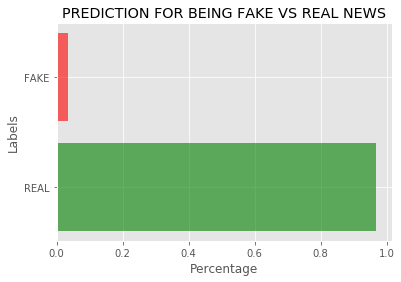


 The Given News Article is REAL 


In [ ]:
x = input("ENTER THE NEWS ARTICLE HERE : ") 
x = text_cleaner(x)
x=[x,]
print("\n",prediction1(x))

# Run the below code if you want to use the Deep Concatted Convolutional  Neural Network model and make the Prediction

In [ ]:
%%time
# Use the below function to load the Saved Tokenizer
with open('/content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 2 - SOURCE CODES AND FILES/Pretrained Models/CNN_tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

import tensorflow as tf 
from keras.preprocessing.sequence import pad_sequences
maxlen2 = 1000

concat_conv_model = tf.keras.models.load_model('/content/drive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 2 - SOURCE CODES AND FILES/Pretrained Models/FAKENEWS_CNN_CONCAT_MODELx2.h5') 

def prediction2(x):
  process1 = tokenizer.texts_to_sequences(x)
  #print("P1",process1)
  process2 = pad_sequences(process1, padding='post', maxlen=maxlen2)
  #print("P3",process2)
  prediction = concat_conv_model.predict([process2,process2,process2])
  prediction = np.squeeze(prediction)
  print("MODP",prediction)
  
  val1 = np.squeeze(prediction)
  val2 = 1 - np.squeeze(prediction)

  value1 = "The Given News Article is REAL "
  value0 = "The Given News Article is FAKE"
  if prediction >= 0.5:
    plot_preds1(val1 , val2)
    return value1
  else:
    plot_preds2(val1 , val2)
    return value0

CPU times: user 5.68 s, sys: 10.1 s, total: 15.8 s
Wall time: 17.6 s


ENTER THE NEWS ARTICLE HERE : India is scheduled to play Bangladesh in a T20 match at the Kotla on 3rd November. The low light smoggy conditions in Delhi is seen as a hazard for the players. Bangladesh players were seen watching Ram Gopal Varma movies to practice the low light conditions and to train their eyes to focus in the dark conditions. Movies made by Ramu are devoid of any light and many times families carry their personal torch to the stadium to be able to watch the movie properly.  images (1)  Movies like Bhoot, Company, Phoonk, Sarkar, and others had been shot in low light conditions and Ramu was appreciated by all for using less electricity while shooting the movies. Though this is the natural style of Ramu, people think he gives extra effort in saving power. Bangladesh players were told about these movies and they have been now continuously watching those movies to acclimatize to Delhi’s conditions.  The rapid spike in Delhi’s air quality index after Diwali has become a ca

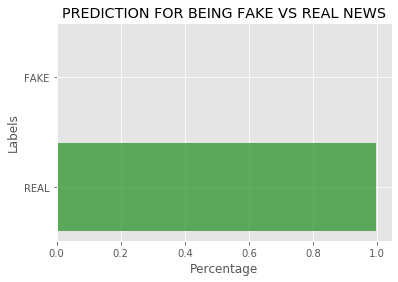


 The Given News Article is REAL 


In [ ]:
x = input("ENTER THE NEWS ARTICLE HERE : ") 
x = text_cleaner(x)
x=[x,]
print("\n",prediction2(x))